## Analog Filters

• Consider a RC circuit with input voltage Vi = 10V applied to the
series RC and output Vo taken from the ends of C with R = 47kΩ
and C = 47nF. Find the transfer function of the circuit and plot
the frequency and magnitude spectrum. Which kind of filter is this?
Prove your claim by putting in the frequency as 100Hz and 10000Hz
and finding the values of Vo. Find the cutoff frequency and verify that
the behaviour is justified.

In [309]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import sympy as sym    #for using symbolic maths
from PIL import Image, ImageFilter
import skimage.filters
import schemdraw
import schemdraw.elements as elm
from sympy import * 
import warnings
warnings.filterwarnings("ignore")
import cv2
import scipy.signal.signaltools as sigtoo

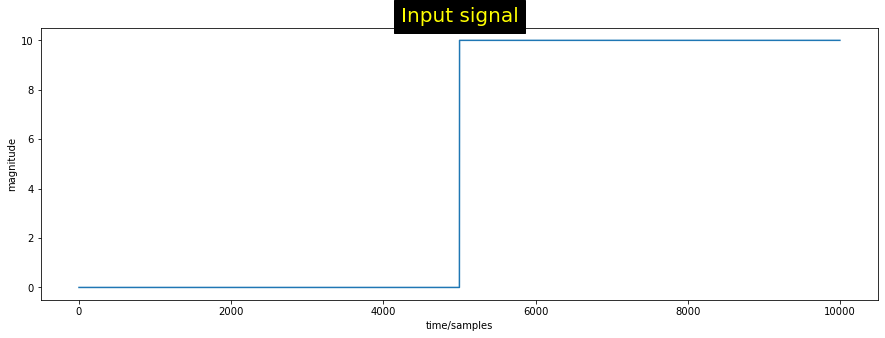

In [310]:
t=np.linspace(-5,5,10000)
V_i=10*(t>=0)

plt.figure(figsize=(15,5))
plt.xlabel("time/samples")
plt.ylabel("magnitude")
plt.title("Input signal",backgroundcolor='black', color='yellow',fontsize=20)
plt.plot(V_i)

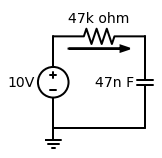

In [311]:
R=47000
C=47*(pow(10,-9))
d=schemdraw.Drawing()
R=d.add(elm.RES,label=("47k ohm"))
d.add(elm.CAP,d="down",label=("47n F"))
d.labelI(R,top=False)
d.add(elm.LINE,d="left")
d.add(elm.GND)
d.add(elm.SOURCE_V,d="up",label="10V")
d.draw()

In [312]:
r=47000
c=47*(pow(10,-9))
s=symbols("s")   #defining my own symbol for frequency consideration

In [313]:
TF=1/(1+r*c*s)

In [314]:
#the transfer function of this circuit
print("The fransfer function of the circuit is below")
TF

The fransfer function of the circuit is below


1/(0.002209*s + 1)

In [315]:
f1=100
f2=10000

Text(0, 0.5, 'mag')

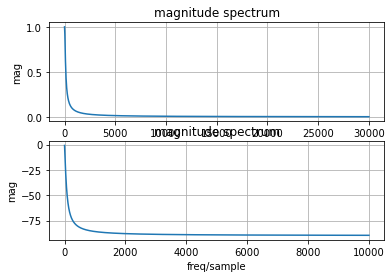

In [503]:
f=np.linspace(1,f2,1000)
w=2*pi*f
H=1/((1j*w*r*c)+1)
magnitude_spectrum=np.abs(H)

plt.figure()
plt.subplot(2,1,1)
plt.title("magnitude spectrum")
plt.plot(f,magnitude_spectrum)
plt.grid("on")
plt.xlabel("freq/sample")
plt.ylabel("mag")


f = np.arange(1,10000,1) # in Hz
w = 2*np.pi*f # in rad/sec
H = 1/((1j*w*r*c)+1) # Transfer function
ph_H = np.angle(H,deg=True) # Phase in degrees
plt.subplot(2,1,2)
plt.title("magnitude spectrum")
plt.plot(f,ph_H)
plt.grid("on")
plt.xlabel("freq/sample")
plt.ylabel("mag")

In [507]:
TF=1/(1+r*c*s)
out=((10/s)*(TF))
print("the output in freq domain is    ",out)

the output in freq domain is     10/(s*(0.002209*s + 1))


In [508]:
ratio_Vof1_Vof2=(abs(out.subs(s,2j*pi*f1))/abs(out.subs(s,2j*pi*f2)))

In [509]:
print("the ratio of the voltage at the 100 and 10000 has the ratio of                 ",ratio_Vof1_Vof2,"                          so it must be a low pass filter")

the ratio of the voltage at the 100 and 10000 has the ratio of                  30.0*sqrt(1 + 17566.8516*pi**2)/sqrt(1 + 19.518724*pi**2)                           so it must be a low pass filter


In [510]:
f=np.linspace(1,f2,1000)
w=2*pi*f
H=1/((1j*w*r*c)+1)
magnitude_spectrum=np.abs(H)
for i in range(len(magnitude_spectrum)):
    if (magnitude_spectrum[i] == 0.707):
        cutoff_freq = i
        break

#### • Consider the same circuit mentioned before, but now the output voltage is taken across the resistor. Does this change the behaviour ofthe transfer function? Find the transfer function of the circuit andplot the frequency and magnitude spectrum. Which kind of filter is this? Prove your claim by putting in the frequency as 100Hz and 10000Hz and nding the values of Vo. Find the cuto frequency and verify that the behaviour is justied.

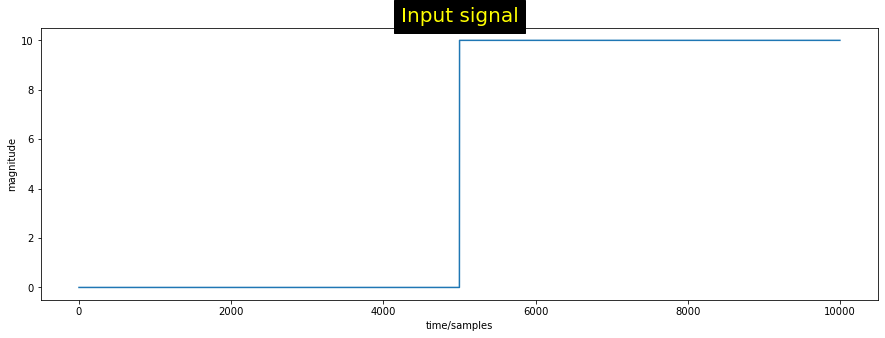

In [511]:
t=np.linspace(-5,5,10000)
V_i=10*(t>=0)

plt.figure(figsize=(15,5))
plt.xlabel("time/samples")
plt.ylabel("magnitude")
plt.title("Input signal",backgroundcolor='black', color='yellow',fontsize=20)
plt.plot(V_i)

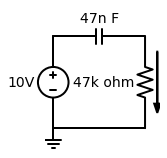

In [512]:
R=47000
C=47*(pow(10,-9))
d=schemdraw.Drawing()
d.add(elm.CAP,label=("47n F"))
R=d.add(elm.RES,d="down",label=("47k ohm"))
d.labelI(R,top=True)
d.add(elm.LINE,d="left")
d.add(elm.GND)
d.add(elm.SOURCE_V,d="up",label="10V")
d.draw()

In [513]:
TF=(r*c*s)/(1+r*c*s)

In [514]:
print("the transfer funmction of the system being")
TF

the transfer funmction of the system being


0.002209*s/(0.002209*s + 1)

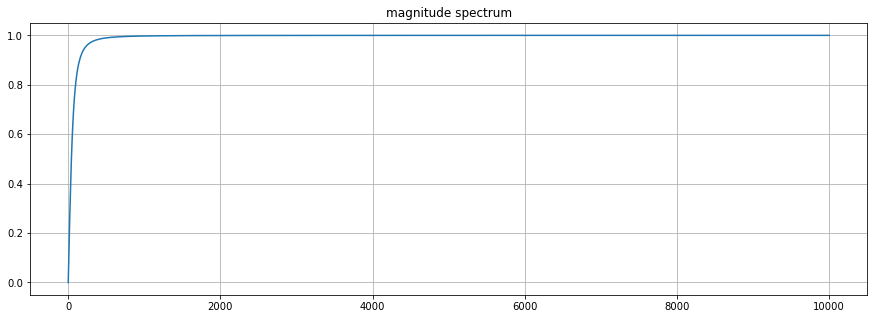

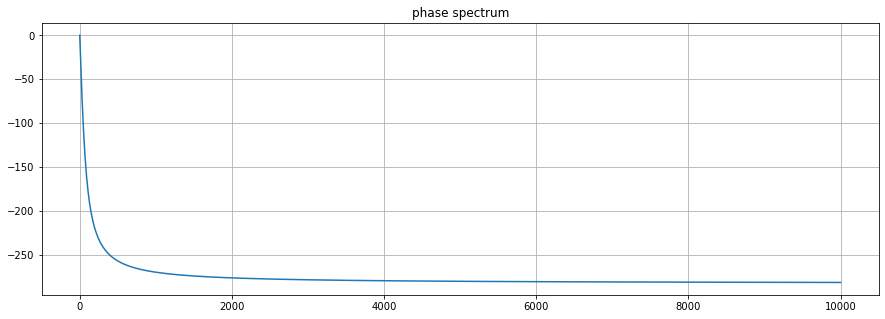

In [515]:
f1=100
f2=10000
f=np.linspace(0,f2,1000)
mag=[]
phase=[]
for i in f:
    x=abs(TF.subs(s,(2j*pi*i)))
    y=-atan(2*pi*i*r*c)
    mag.append(x)
    phase.append(y*180)
plt.figure(figsize=(15,5))
plt.title("magnitude spectrum")
plt.plot(f,mag)
plt.grid("on")
plt.figure(figsize=(15,5))
plt.title("phase spectrum")
plt.plot(f,phase)
plt.grid("on")

In [516]:
out=(10/s*TF)
print("the output in freq domain is    ",out)

the output in freq domain is     0.02209/(0.002209*s + 1)


In [517]:
ratio_Vof1_Vof2=(abs(out.subs(s,(2j*pi*f1)))/abs(out.subs(s,(2j*pi*f2))))

In [518]:
print("the ratio of the voltage at the 100 and 10000 has the ratio of   ")
pprint(ratio_Vof1_Vof2)
print("so its a hight pass filter")

the ratio of the voltage at the 100 and 10000 has the ratio of   
       __________________
      ╱                2 
1.0⋅╲╱  1 + 1951.8724⋅π  
─────────────────────────
     ___________________ 
    ╱                 2  
  ╲╱  1 + 0.19518724⋅π   
so its a hight pass filter


In [519]:
E1=sym.Eq(TF-np.sqrt(1/2))
cut_off_freq_w=sym.solve(E1)
print("The cutt_off frequnecy of the circuit/ TF is:   ",cut_off_freq_w)

The cutt_off frequnecy of the circuit/ TF is:    [1092.89885123273]


• Design a second order low pass filter using RC circuit. Do the analysis for R = 50K and C = 50nF. The input voltage waveform is 10 sin 2t. Plot the amplitude and frequency spectrum.

In [520]:
#this can be obtained by simpy adding one more 1-order low pass filter to the circuit

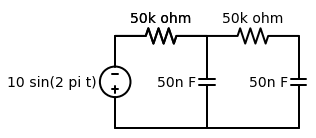

In [521]:
R=50000
C=50*(pow(10,-9))
d=schemdraw.Drawing()
R=d.add(elm.RES,label=("50k ohm"))
d.add(elm.CAP,d="down",label=("50n F"))
d.add(elm.LINE,d="right")
d.add(elm.CAP,d="up",label=("50n F"))
d.add(elm.RES,d="left",label=("50k ohm"))
d.add(elm.RES,d="left",label=("50k ohm"))
d.add(elm.SOURCE_V,d="down",label="10 sin(2 pi t)")
d.add(elm.LINE,d="right")
d.draw()

Text(0, 0.5, 'magnitude')

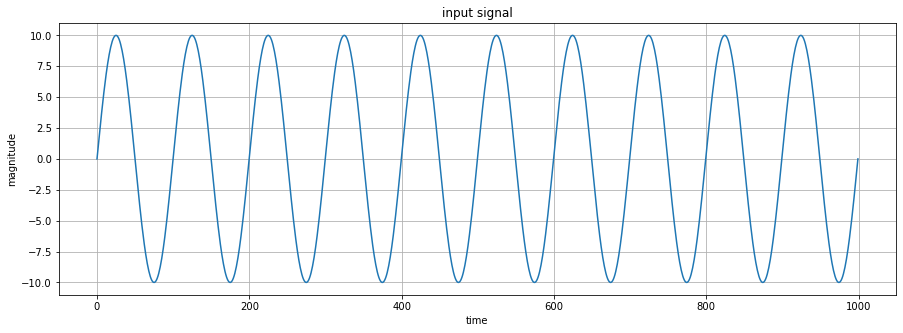

In [538]:
t=np.linspace(0,10,1000)
V_in=10*np.sin(2*np.pi*t)
plt.figure(figsize=(15,5))
plt.plot(V_in)
plt.grid("on")
plt.title("input signal")
plt.xlabel("time")
plt.ylabel("magnitude")

In [539]:
R1=50000
R2=50000
C1=50*(pow(10,-9))
C2=50*(pow(10,-9))

In [540]:
TF=(1/(R1*R2*C1*C2))/(s**2 +s*((1/(C1*R1))+(1/(C1*R2))+(1/(C2*R2)))+(1/(C1*C2*R1*R2)))

In [541]:
print("The transfet function of the function being")
TF

The transfet function of the function being


160000.0/(s**2 + 1200.0*s + 160000.0)

In [542]:
Inp_s=10*2*pi/(s**2 +(2*pi)**2)
out=Inp_s*TF

In [543]:
print("the value of the outpu tin the laplace domain is below  : ")
out

the value of the outpu tin the laplace domain is below  : 


3200000.0*pi/((s**2 + 4*pi**2)*(s**2 + 1200.0*s + 160000.0))

In [544]:
f=np.arange(1,1000,0.1)

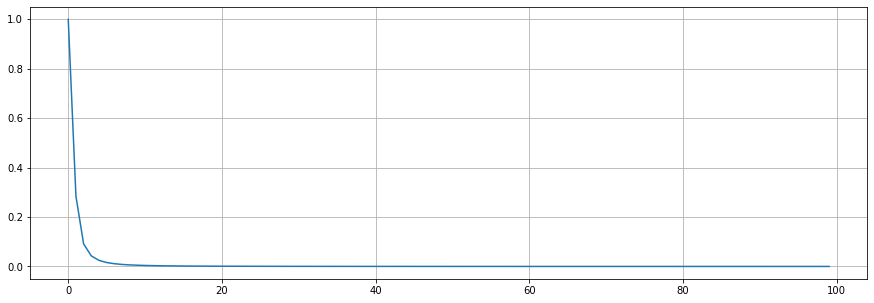

In [545]:
R = 50*(10**3)
C = 50*(10**-9)
f = np.arange(0,1000,1)
H = 1/(1+(1j*w*R*C))**2
plt.figure(figsize=(15,5))
mag_spect= abs(H)
plt.plot(mag_spect)
plt.grid("on")

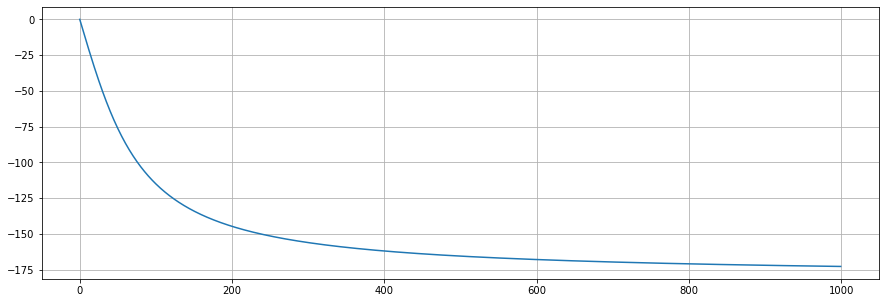

In [546]:
w = 2*np.pi*f # Angular freq in rad/sec
H = 1/(1+(1j*w*R*C))**2 # Transfer function
ph = np.angle(H,deg=True) # Phase in degrees
plt.figure(figsize=(15,5))
plt.plot(ph)
plt.grid("on")


In [547]:
f1=100
f2-1000
w1= 2*np.pi*f1
H1 = 1/(1+(1j*w1*R*C))**2 
ph1 = np.angle(H1,deg=True) 
print("at 100 Hz mag and phase are respectively",H1, ph1)
w2= 2*np.pi*f2
H2 = 1/(1+(1j*w2*R*C))**2 
ph2 = np.angle(H2,deg=True) 
print("at 100 Hz mag and phase are respectively",H2, ph2)

at 100 Hz mag and phase are respectively (-0.12205081254740296-0.2613013824184971j) -115.0367268189405
at 100 Hz mag and phase are respectively (-4.50310288244342e-06-1.9111848276907932e-08j) -179.7568295242701


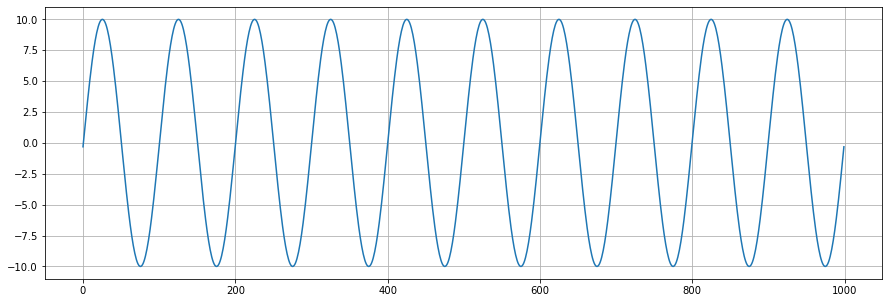

In [548]:
t=np.linspace(0,10,1000)
w= 2*np.pi*1
H = 1/(1+(1j*w*R*C))**2 
mag = abs(H)
phase = np.angle(H)
vo = 10*mag*np.sin(2*np.pi*1*t+phase)
plt.figure(figsize=(15,5))
plt.plot(vo)
plt.grid("on")

Design a band pass lter using cascaded RC circuits. Make use of
the values of the 2 resistors as 20K
. The lter should pass all the
frequencies between 1kHz and 30kHz. Find the transfer function of
the same and plot the magnitude and amplitude of the lter.

In [549]:
R1=20000
R2=20000
f1=1000
f2=30*(10**3)
C1 = 1/(2*np.pi*f1*R) 
C2 = 1/(2*np.pi*f2*R)

In [550]:
TF= (R1*(1/(C1*s)))/(R1+(1/(C1*s)))/((R1*(1/(C1*s)))/(R1+(1/(C1*s)))+R2+(1/(C2*s)))

In [551]:
print("The ransfer function of the filter showun above is :     ")
TF

The ransfer function of the filter showun above is :     


6283185307179.59/(s*(20000 + 314159265.358979/s)*(20000 + 9424777960.76938/s + 6283185307179.59/(s*(20000 + 314159265.358979/s))))

In [552]:
f = np.arange(1,10000,100)
w = 2*np.pi*f 
H1= ((1j*w*R*C1)/((1j*w*R*C1)+1))*(1/((1j*w*R*C2)+1))
mag=H1
ph = np.angle(H1) # Phase in degrees

Text(0.5, 1.0, 'phase')

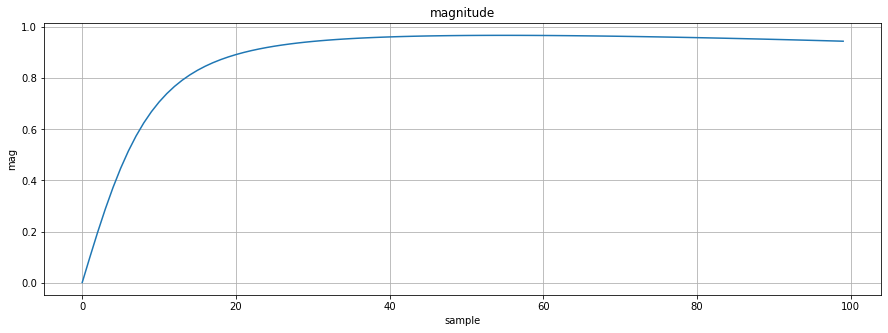

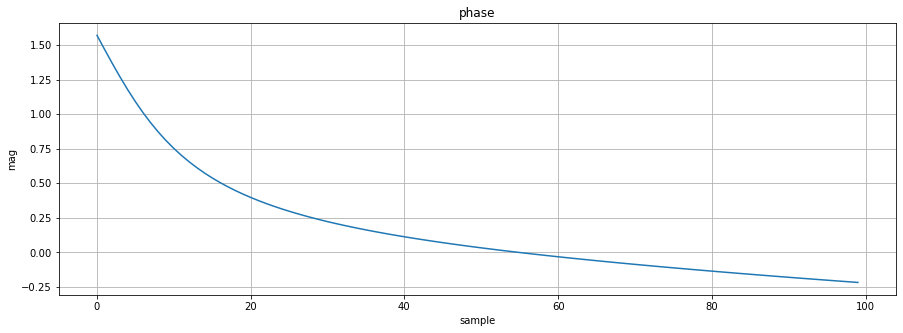

In [558]:
plt.figure(figsize=(15,5))
plt.plot(abs(mag))
plt.title("magnitude")
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")
plt.figure(figsize=(15,5))
plt.plot(ph)
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")
plt.title("phase")

# DIGITAL FILTER

Consider the dierence equation:
y[n] = x[n] + x[n 􀀀 1]
Find the output of the system to the sequence: x[n] = f1; 2; 3; 4; 5; 6; 7; 8; 9; 10g
What kind of lter is this? Compute the transfer function to plot the frequency and amplitude plots to verify your claim. Consider the
sinusoidal input to the lter with unit amplitude. Take the sampling
rate to be 1 Hz. Find and plot the lter output.

In [559]:
#assuming X_n is zeros before n=0
x_n=np.array([1,2,3,4,5,6,7,8,9,10])

[3, 5, 7, 9, 11, 13, 15, 17, 19]


Text(0, 0.5, 'mag')

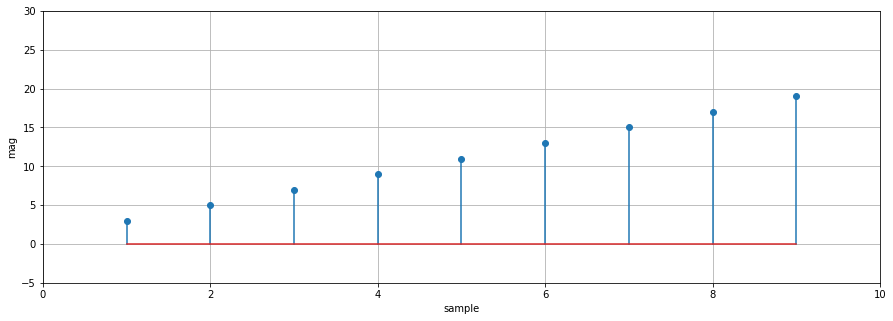

In [565]:
#assuming signal to be periodic
out=[]
n=np.linspace(1,9,9)
for i in range(1,len(x_n)):
    y=x_n[i-1]+x_n[i]
    out.append(y)
print(out)
plt.figure(figsize=(15,5))
plt.xlim(0,10)
plt.ylim(-5,30)
plt.stem(n,out)
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")





Text(0, 0.5, 'mag')

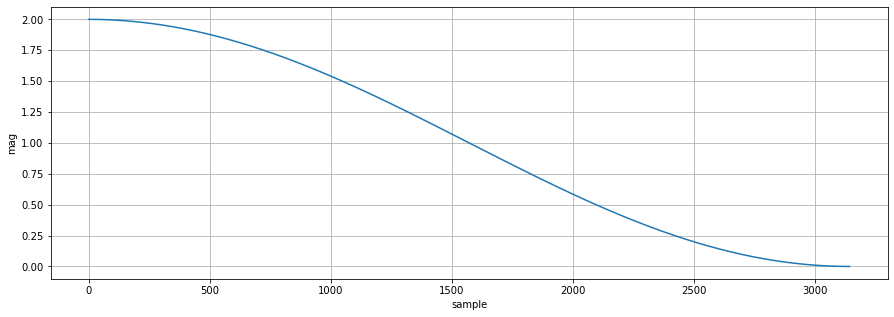

In [566]:
# taking inverse z transfrom of the given (1+z**(-1))
n = np.arange(0,30,1)
w = np.arange(0,pi,0.001)
resp=[]
phase=[]
for i in w:
    p=1+np.exp(1j*i)
    q=-atan((sin(i))/(1+cos(i)))
    resp.append(p)
    phase.append(q)
plt.figure(figsize=(15,5))
plt.grid("on")
plt.plot(resp)
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")

Text(0, 0.5, 'mag')

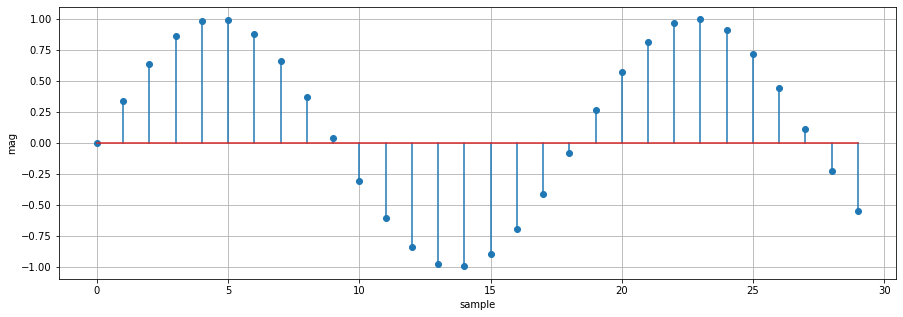

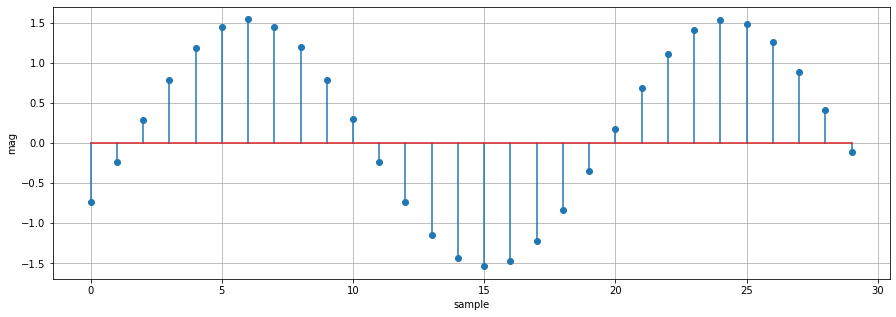

In [568]:
n=np.linspace(0,10,30)
inp=np.sin(n)
w=1
mag_gain=(1+np.exp(1j*1))
phase=-atan((sin(1))/(1+cos(1)))
output=mag_gain*np.sin(n-0.5)
plt.figure(figsize=(15,5))
plt.stem(inp)
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")
plt.figure(figsize=(15,5))
plt.stem(output)
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")

Consider the dierence equation:
y[n] =
1
3
(x[n] + x[n 􀀀 1] + x[n 􀀀 2])
What is this lter called? Compute the transfer function to plot the
frequency and amplitude spectrum. What are the applications of this
lter? Improve the above lter by the dierential equation:
y[n] =
1
4
x[n] +
1
2
x[n 􀀀 1] +
1
4
x[n 􀀀 2]
and again do the whole analysis.

In [569]:
z=symbols("z")
n=np.linspace(0,10,30)
w = np.arange(0,pi/2,0.1)

In [570]:
TF=(1+(z**-1)+(z**-2))/3
print("the transfer function is of low pass moving avg filter ")
TF

the transfer function is of low pass moving avg filter 


1/3 + 1/(3*z) + 1/(3*z**2)

Text(0, 0.5, 'angle')

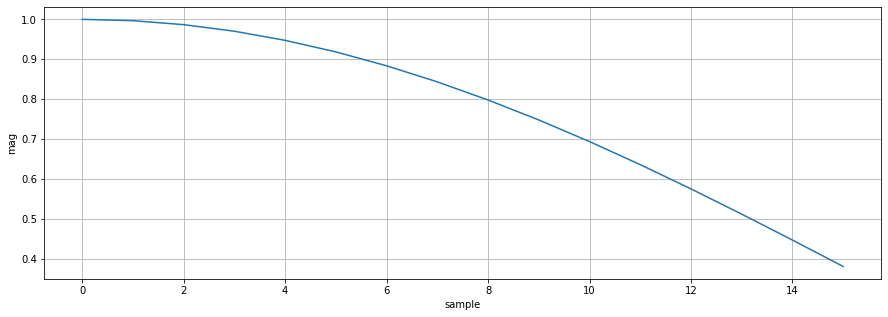

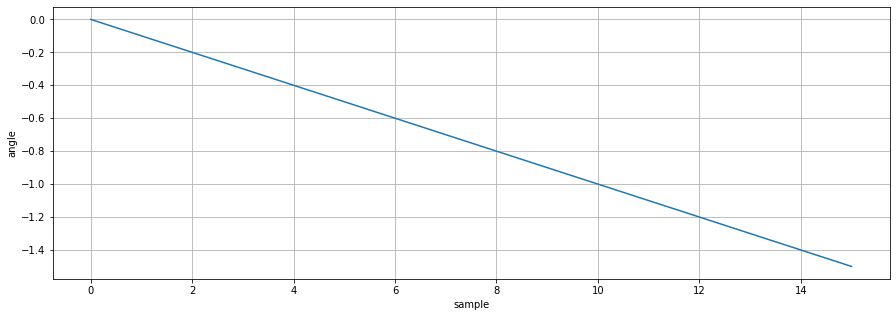

In [574]:
mov_avg=[]
phase=[]
for i in w:
    p=(1+np.exp(-1j*i)+np.exp(-2j*i))/3
    q=np.angle(p)
    mov_avg.append(abs(p))
    phase.append(q)
plt.figure(figsize=(15,5))
plt.plot(mov_avg)
plt.xlabel("sample")
plt.ylabel("mag")
plt.grid("on")
plt.figure(figsize=(15,5))
plt.plot(phase)
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("angle")

y[n] =1/4(x[n]) +1/2(x[n 􀀀 1]) +1/4(x[n 􀀀 2])

In [575]:
tf=0.25+0.5*(z**-1)+0.25*(z**-2)

In [576]:
print("the given filter is the hanning filter with transfer function given below")
tf

the given filter is the hanning filter with transfer function given below


0.25 + 0.5/z + 0.25/z**2

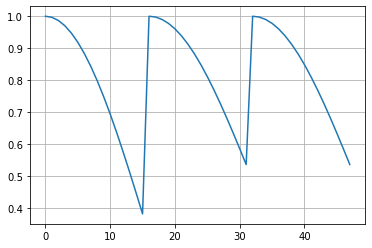

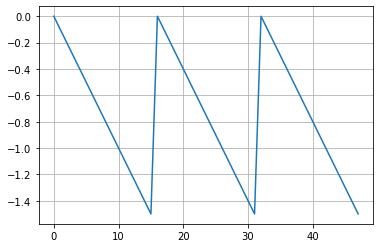

In [578]:
hann_mag=[]
hann_phase=[]
for i in w:
    p=(0.25+0.5*np.exp(-1j*i)+0.25*np.exp(-2j*i))
    q=np.angle(p)
    mov_avg.append(abs(p))
    phase.append(q)
plt.figure()
plt.plot(mov_avg)
plt.grid("on")
plt.figure()
plt.plot(phase)
plt.grid("on")

Take any digital image of your choice and apply mean and median
ltering. What are the dierences between the two? 

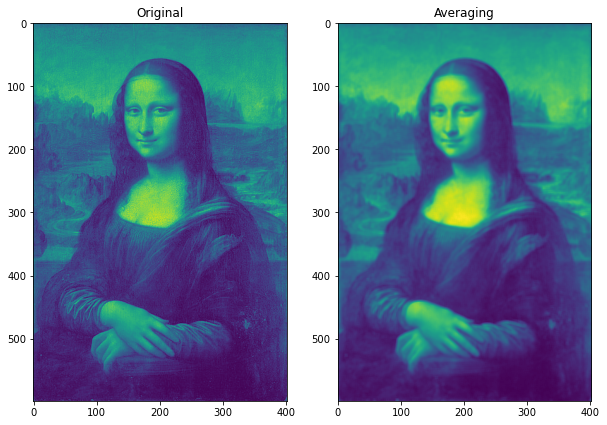

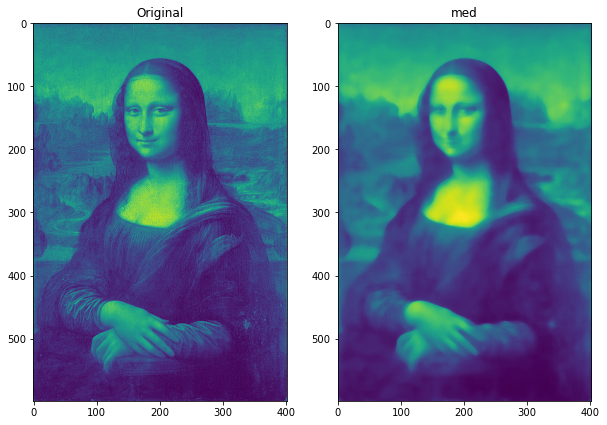

In [579]:
I=cv2.imread("monalisa.jpg")
I1=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(I1,-1,kernel)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(I1),plt.title('Original')
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.show()



median = cv2.medianBlur(I1,11)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(I1),plt.title('Original')
plt.subplot(122),plt.imshow(median),plt.title('med')
plt.show()

Take an image
and add speckle noise to it. Use a particular lter to remove this
noise. Take another image and add salt and pepper noise and again
use a particular lter to remove the noise. Plot the original images,
noisy images and images after noise removal respectively.

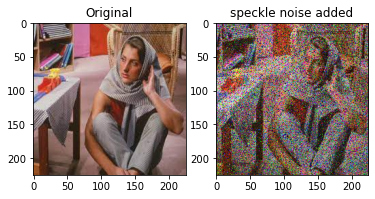

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x1aa2c1b2850>,
 Text(0.5, 1.0, 'wiener filter iutput'))

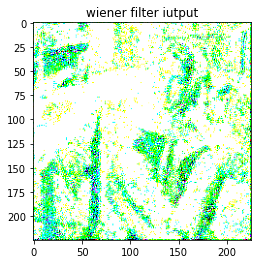

In [580]:
I=cv2.imread("images.jfif")
I1=(cv2.cvtColor(I,cv2.COLOR_BGR2RGB))
img = Image.fromarray(np.uint8(I1))
gauss = np.random.normal(0,1,I1.size)
gauss = gauss.reshape(I1.shape[0],I1.shape[1],I1.shape[2]).astype('uint8')
img_speck= I1+ I1* gauss
plt.subplot(121),plt.imshow(I1),plt.title('Original')
plt.subplot(122),plt.imshow(img_speck),plt.title('speckle noise added')
plt.show()
filtered_output=sigtoo.wiener(img_speck)
plt.imshow(filtered_output),plt.title("wiener filter iutput")

In [581]:
#for salt and paper noise
I=cv2.imread("tajmahal.jpg")
I1 = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)

In [582]:
salt=np.ceil(0.3*I1.size*0.7)
coords_salt = [np.random.randint(0, i - 1, int(salt)) for i in I1.shape]
I1[coords_salt] = 1

In [583]:
num_pepper = np.ceil(0.3* I1.size * (0.3))
coords_pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in I1.shape]
I1[coords_pepper] = 0

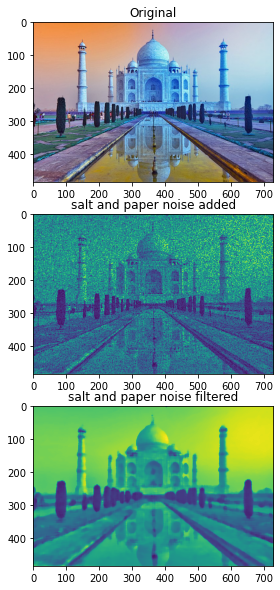

In [584]:
plt.figure(figsize=(10,10))
plt.subplot(311),plt.imshow(I),plt.title('Original')
plt.subplot(312),plt.imshow(I1),plt.title('salt and paper noise added')
median = cv2.medianBlur(I1, 11)
plt.subplot(313),plt.imshow(median),plt.title('salt and paper noise filtered')
plt.show()

Can we convert an analog lter into a digital lter altogether? What
is the way to do it? Use the technique to convert all the analog lters
into digital lters and plot the amplitude and frequency plots.


In [587]:
R = 47*(10**3)
C = 47*(10**-9)
fl = 1 *(10**3)
f2 = 30 *(10**3)
C1 = 1/(2*pi*R*fl)
C2 = 1/(2*pi*R*f2)
f = np.arange(0,10000,1)
w = np.arange(0,pi,0.1)
T = 1

s = (2/T)*(((1j*w) - 1)/((1j*w) + 1))

In [591]:
H_l_ana = (1/(R*C))/((1j)*(2*pi*f) + 1/(R*C))
H_l_dig = (1/(R*C))/(s + 1/(R*C))

H_l2_ana = ((1/(R*C))/((1j)*(2*pi*f) + 1/(R*C)))**2
H_l2_dig = ((1/(R*C))/(s + 1/(R*C)))**2

H_h_ana = ((1j)*(2*pi*f))/((1j)*(2*pi*f) + 1/(R*C))
H_h_dig = s/(s + 1/(R*C))

H_b_ana = H_h_ana*H_l_ana
H_b_dig = H_h_dig*H_l_dig

In [593]:
llist=[abs(H_l_ana),H_l_dig,H_l2_ana,H_l2_dig,H_h_ana,H_h_dig,H_b_ana,H_b_dig]

Text(0, 0.5, 'mag')

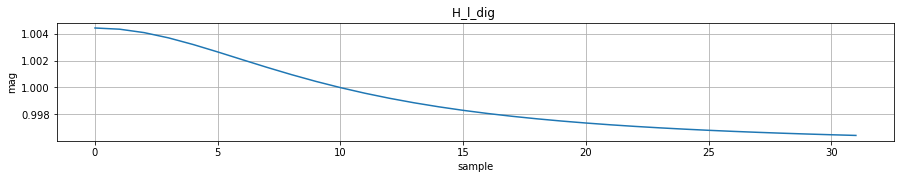

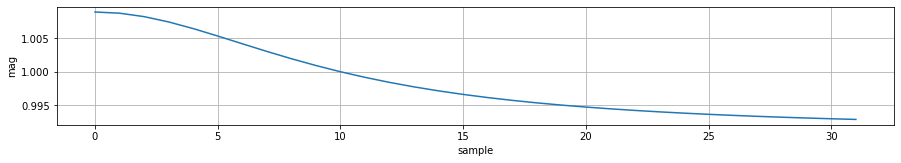

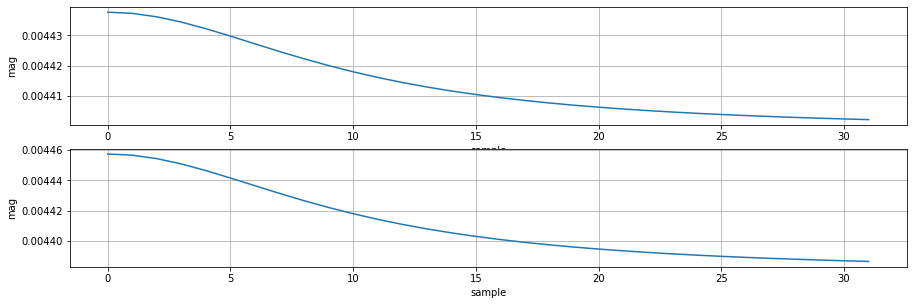

In [605]:
plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(abs(H_l_dig))
plt.grid("on")
plt.title("H_l_dig ")
plt.xlabel("sample")
plt.ylabel("mag")
plt.figure(figsize=(15,10))
plt.subplot(412)
plt.plot(abs(H_l2_dig))
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")
plt.figure(figsize=(15,10))
plt.subplot(413)
plt.plot(abs(H_h_dig))
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")
plt.subplot(414)
plt.plot(abs(H_b_dig))
plt.grid("on")
plt.xlabel("sample")
plt.ylabel("mag")
